<a href="https://colab.research.google.com/github/vmr1532/kaggle-projects/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
!pip install kaggle


In [3]:
!kaggle competitions download -c digit-recognizer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

 97% 71.0M/73.2M [00:00<00:00, 78.3MB/s]
100% 73.2M/73.2M [00:00<00:00, 149MB/s] 
 66% 32.0M/48.8M [00:00<00:00, 81.9MB/s]
100% 48.8M/48.8M [00:00<00:00, 140MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 27.8MB/s]


In [0]:
!kaggle competitions download -c digit-recognizer

404 - Not Found


In [0]:


import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas

In [0]:
import csv
import numpy
train1=pandas.read_csv("train.csv")
test1=pandas.read_csv("test.csv")

In [8]:
print(train1.shape)
print(train1.info())
train1.head()


(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = numpy.asarray(train1.drop('label',axis=1),dtype=numpy.float32).reshape(-1,28,28)
yhat = numpy.asarray(train1['label'])

# Generate random indices for creating a random validation set with 20% of the labelled data
validx = (numpy.random.uniform(size=len(X)) <= 0.2)

# Create training set (80% of the labelled data)
X_trn = X[~validx]
y_trn = yhat[~validx]

# Create validation set (20% of the labelled data)
X_val = X[validx]
y_val = yhat[validx]

# Create the test set
X_tes = numpy.asarray(test1,dtype=numpy.float32).reshape(-1,28,28)

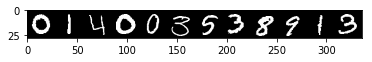

array([0, 1, 4, 0, 0, 3, 5, 3, 8, 9, 1, 3])

In [10]:
nvis = 12
plt.imshow(numpy.concatenate(X_trn[:nvis],axis=1),cmap='gray',vmin=0,vmax=255)
plt.show()

# Print the corresponding labels to check they match
y_trn[:nvis]

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import keras,numpy
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
model=Sequential()
model.add(Flatten()) #Since the dataloader outputs 28x28 images, flatten it to 784
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
y=model.fit(X_trn,keras.utils.to_categorical(y_trn, num_classes=10, dtype='int'), epochs=300, batch_size=128)
print("\n%s: %.2f%%" % (model.metrics_names[1], y[1]*100))

Epoch 1/300
33560/33560 [==============================] - 1s 44us/step - loss: 7.7449 - acc: 0.5131
Epoch 2/300
33560/33560 [==============================] - 1s 36us/step - loss: 4.6836 - acc: 0.7042
Epoch 3/300
33560/33560 [==============================] - 1s 36us/step - loss: 4.3969 - acc: 0.7231
Epoch 4/300
33560/33560 [==============================] - 1s 37us/step - loss: 4.1978 - acc: 0.7358
Epoch 5/300
33560/33560 [==============================] - 1s 36us/step - loss: 4.1103 - acc: 0.7418
Epoch 6/300
33560/33560 [==============================] - 1s 35us/step - loss: 4.0229 - acc: 0.7472
Epoch 7/300
33560/33560 [==============================] - 1s 36us/step - loss: 3.9626 - acc: 0.7516
Epoch 8/300
33560/33560 [==============================] - 1s 36us/step - loss: 3.9227 - acc: 0.7539
Epoch 9/300
33560/33560 [==============================] - 1s 35us/step - loss: 3.8948 - acc: 0.7557
Epoch 10/300
33560/33560 [==============================] - 1s 35us/step - loss: 3.8665 - a

TypeError: ignored

In [36]:
# round predictions
predictions = model.predict(X_tes)
rounded = [round(X_tes[0]) for X_tes in predictions]
print(predictions)
sub = pandas.DataFrame({"ImageId":numpy.arange(1,28001),"Label":rounded})
print(sub)



[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
       ImageId  Label
0            1    0.0
1            2    1.0
2            3    0.0
3            4    0.0
4            5    0.0
5            6    0.0
6            7    1.0
7            8    0.0
8            9    1.0
9           10    0.0
10          11    0.0
11          12    0.0
12          13    0.0
13          14    1.0
14          15    0.0
15          16    0.0
16          17    0.0
17          18    0.0
18          19    0.0
19          20    1.0
20          21    0.0
21          22    0.0
22          23    0.0
23          24    0.0
24          25    0.0
25          26    0.0
26          27    0.0
27          28    0.0
28          29    0.0
29          30    0.0
...        ...    ...
27970    27971    0.0
27971    27972    1.0
27972    27973    0.0
27973    27974    0.0
27974    27975    1.0
27975    27976    0.0
27976   

In [0]:
sub.to_csv("sub.csv",index=False)

In [38]:
!kaggle competitions submit -c digit-recognizer -f sub.csv -m "submission2"

100% 263k/263k [00:03<00:00, 78.5kB/s]
Successfully submitted to Digit Recognizer